# Pymaceuticals Inc.
---

### Analysis

- Mouse weight(g) and tumor volume (mm3) show strong positive correlation (correlation = 0.84), where tumor volume increases with increased mouse weight.

- The box plot showing the distribution of final tumor size (mm3) across four treatments ('Capomulin','Ramicane', 'Infubinol', 'Ceftamin') and quartile/outlier calculations indicate that the collected data is consistent and reliable. 

- We should note that Capomulin and Ramicane test groups were bigger compared to the size of other treatment groups; as a result more data points were collected and bigger samples generally are better representations.

- Capomulin and Ramicane treatments resulted in smaller final tumor volumes for mice (median tumore size of 41.6 mm3, 40.7 mm3, respectively) compared to other treatments (median tumor size range of 50.4 - 52.5 mm3).

- When we look at the line plot of tumor volume in mouse I509 over 45 days of treatment with Capomulin, we observe that the effects of treatment are visible after the initial twenty days. However, we'd need to plot the average tumor size across all mice treated with Capomulin over the 45 days to get a more reliable visual on the effectiveness of treatment over time.
 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup

import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

final_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview

final_results.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [3]:
# Checking the number of mice.
len(final_results["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = [final_results[final_results.duplicated()]['Mouse ID']]
duplicates

[909    g989
 Name: Mouse ID, dtype: object]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_duplicates = final_results.loc[(final_results['Mouse ID'] == "g989")]
g989_duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_clean = final_results.loc[final_results['Mouse ID'] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.

len(final_clean["Mouse ID"].unique())

248

In [8]:
final_clean.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tum_v = final_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
med_tum_v = final_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tum_v = final_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdev_tum_v = final_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_tum_v = final_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

tumor_volume_statistics = pd.DataFrame({
                        "Mean Tumor Volume":mean_tum_v,
                        "Median Tumor Volume":med_tum_v,
                        "Tumor Volume Variance":var_tum_v,
                        "Tumor Volume Std. Dev.": stdev_tum_v,
                        "Tumor Volume Std. Err.": SEM_tum_v 
})

tumor_volume_statistics

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [10]:
# Using the aggregation method, produce the same summary statistics in a single line.
#drug_regimen_summary = pd.DataFrame(final_clean.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"])

drug_regimen_summary = final_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

drug_regimen_summary

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


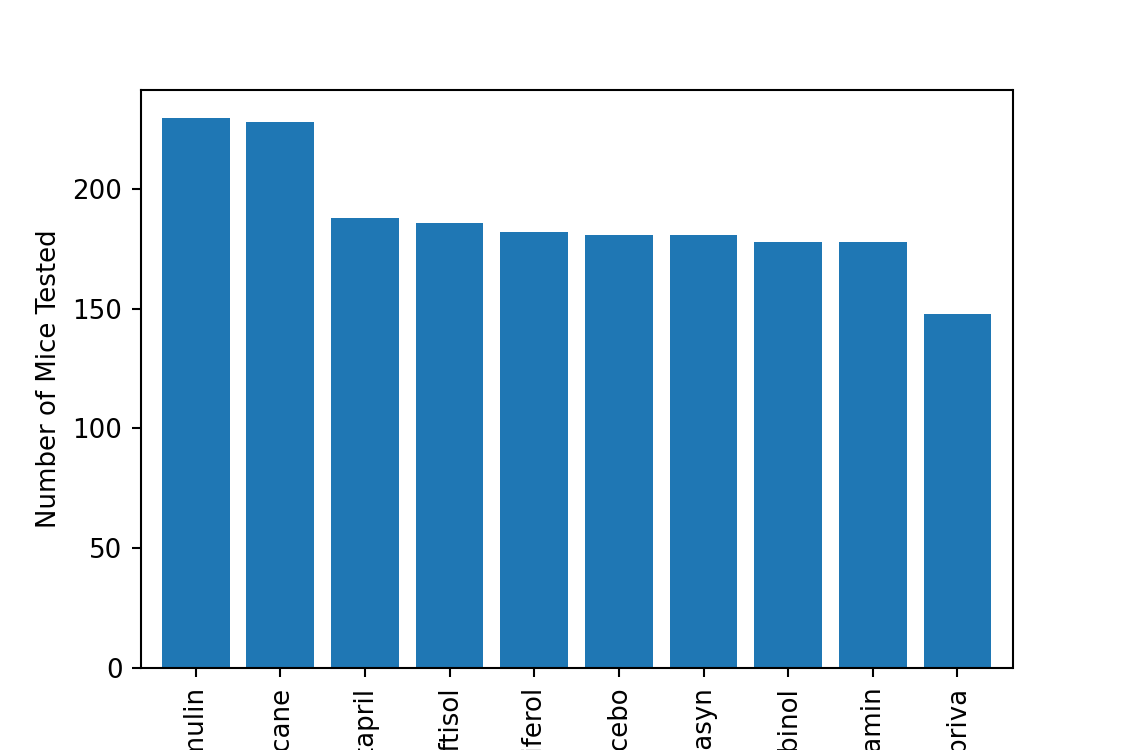

Text(0, 0.5, 'Number of Mice Tested')

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested_for_each_drug = final_clean["Drug Regimen"].value_counts()
#mice_tested_for_each_drug = mice_tested_for_each_drug.sort_values('count', ascending=False)
barplot = mice_tested_for_each_drug.plot.bar(width=0.8, figsize=(6, 4))
barplot.set_xlabel("Drug Regimen")
barplot.set_ylabel("Number of Mice Tested")

In [12]:
mice_tested_for_each_drug.keys()
mice_tested_for_each_drug.values
#mice_tested_for_each_drug.values["count"]

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

<IPython.core.display.Javascript object>


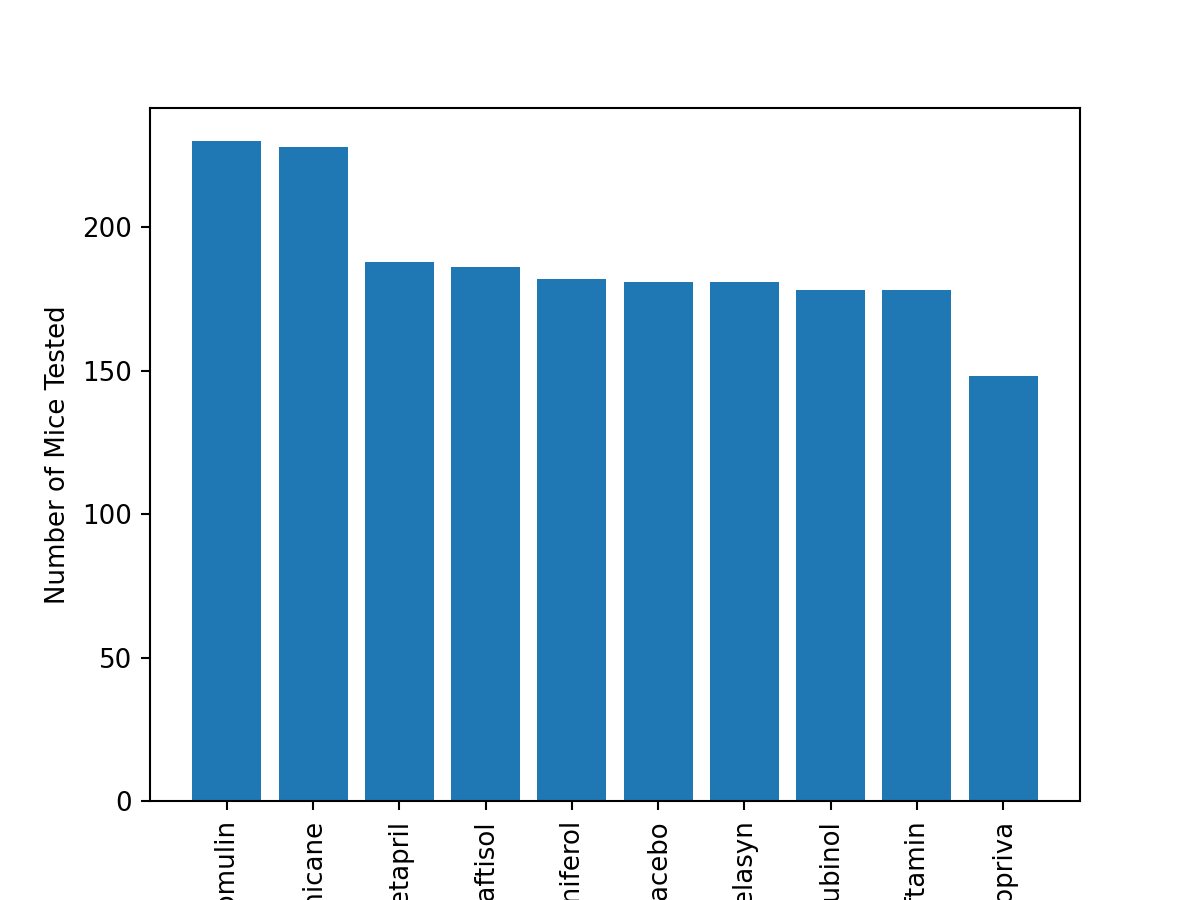

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = mice_tested_for_each_drug.keys()
micenumber = mice_tested_for_each_drug.values

# creating the bar plot
 
plt.bar(drugs, micenumber)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of Mice Tested", fontsize=10)
plt.xticks(rotation='vertical', fontsize=10)
plt.show()            

<IPython.core.display.Javascript object>


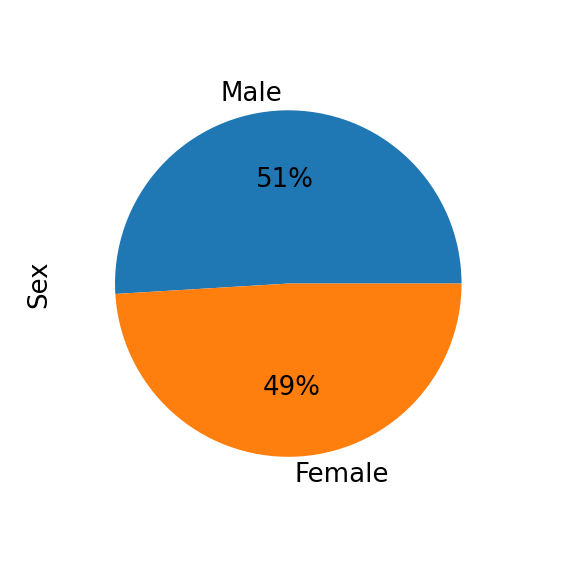

<AxesSubplot: ylabel='Sex'>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

final_by_sex = final_clean['Sex'].value_counts()
final_by_sex.plot.pie(autopct='%1.0f%%', figsize=(3,3))

<IPython.core.display.Javascript object>


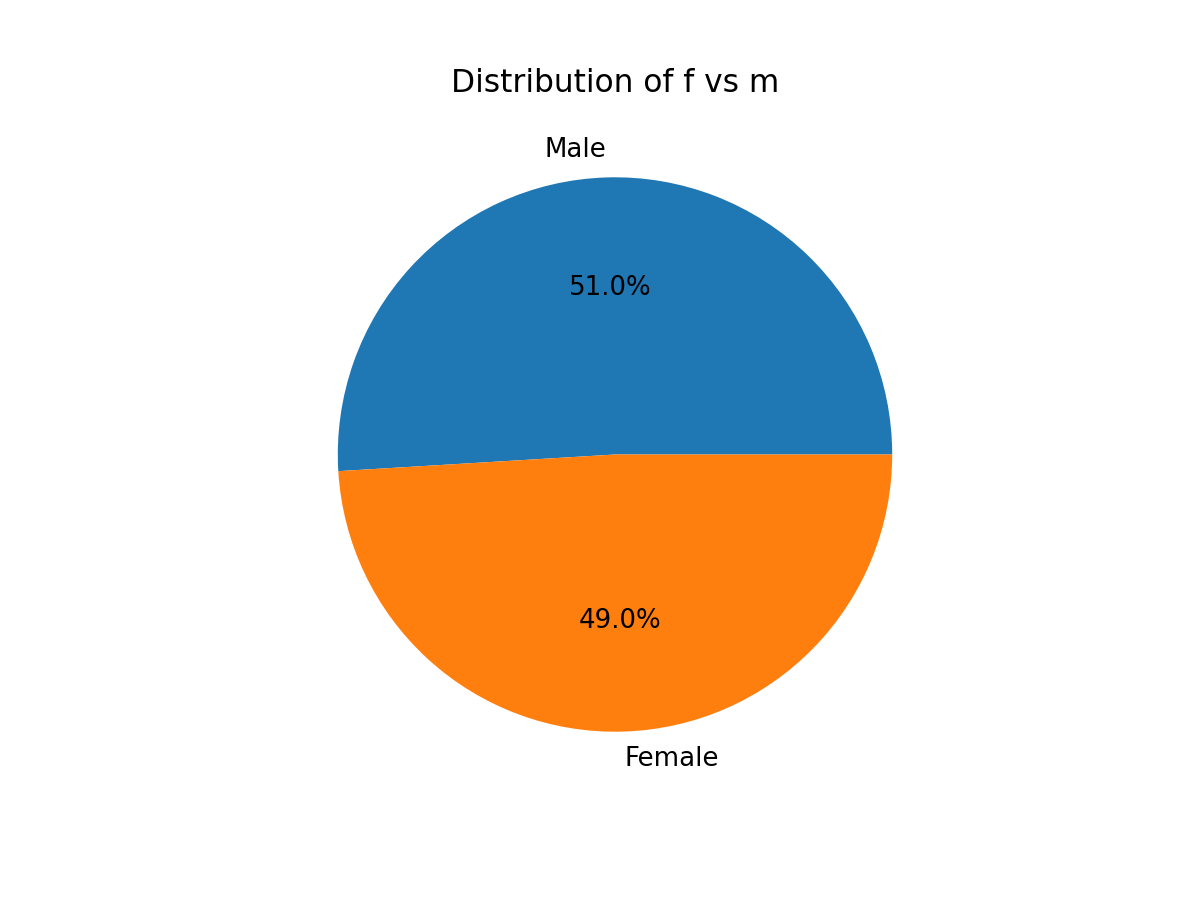

Text(0.5, 1.0, 'Distribution of f vs m')

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(final_by_sex, labels=('Male', 'Female'), autopct="%1.1f%%")
plt.title("Distribution of f vs m")


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tp = pd.DataFrame(final_clean.groupby(["Mouse ID"])["Timepoint"].max())
last_tp
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(final_clean, last_tp, on="Mouse ID")
merged_df.loc[merged_df['Timepoint_x']==45].head(15)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint_x  \
9       k403     Ramicane    Male          21          16           45   
19      s185    Capomulin  Female           3          17           45   
29      x401    Capomulin  Female          16          15           45   
39      m601    Capomulin    Male          22          17           45   
49      g791     Ramicane    Male          11          16           45   
59      s508     Ramicane    Male           1          17           45   
74      m546     Ramicane    Male          18          16           45   
84      z578     Ramicane    Male          11          16           45   
94      j913     Ramicane  Female           4          17           45   
104     u364    Capomulin    Male          18          17           45   
114     n364     Ramicane    Male           4          17           45   
124     y793    Capomulin    Male          17          17           45   
134     r554    Capomulin  Female           8          17           45   
144     m957    Capomulin  Female           3          19           45   
154     c758     Ramicane    Male           9          17           45   

     Tumor Volume (mm3)  Metastatic Sites  Timepoint_y  
9             22.050126                 1           45  
19            23.343598                 1           45  
29            28.484033                 0           45  
39            28.430964                 1           45  
49            29.128472                 1           45  
59            30.276232                 0           45  
74            30.564625                 1           45  
84            30.638696                 0           45  
94            31.560470                 1           45  
104           31.023923                 3           45  
114           31.095335                 1           45  
124           31.896238                 2           45  
134           32.377357                 3           45  
144           33.329098                 1           45  
154           33.397653                 1           45

In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data_all_four = []
   
    
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_specific_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    # Locate the row for the max (latest) time point and extract the tumor volume for only that timepoint    
    tumor_vol_data_by_drug =  drug_specific_df.loc[drug_specific_df['Timepoint_x']==drug_specific_df['Timepoint_y']]['Tumor Volume (mm3)']
    # Append the drug specific values to list that contains tumor vol data for all four treatments
    tumor_vol_data_all_four.append(tumor_vol_data_by_drug)
    # Calculate the IQR
    quartiles = tumor_vol_data_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    iqr1_5 = iqr * 1.5
    
    #print(quartiles, lowerq, upperq, iqr)
    print(f"For the {drug} treatment:")
    print(f"The lower quartile of tumor volume for is: {lowerq}")
    print(f"The upper quartile of tumor volume for is: {upperq}")
    print(f"The interquartile range of tumor volume for is: {iqr}")
    print(f"The the median of tumor volume for is: {quartiles[0.5]} ")
    print(f"------------------")
    #quantitatively determine if there are any potential outliers.
    # add subset 
    lower_bound = lowerq - iqr1_5
    upper_bound = upperq + iqr1_5
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"------------------")
    # Determine outliers using upper and lower bounds
    outlier = tumor_vol_data_by_drug.loc[(tumor_vol_data_by_drug<lower_bound) | (tumor_vol_data_by_drug>upper_bound)]
    print(f"{drug}'s potential outliers: {outlier}")
    print(f"------------------------------------------------------------")
    
    

For the Capomulin treatment:
The lower quartile of tumor volume for is: 32.37735684
The upper quartile of tumor volume for is: 40.1592203
The interquartile range of tumor volume for is: 7.781863460000004
The the median of tumor volume for is: 38.1251644 
------------------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------
For the Ramicane treatment:
The lower quartile of tumor volume for is: 31.56046955
The upper quartile of tumor volume for is: 40.65900627
The interquartile range of tumor volume for is: 9.098536719999998
The the median of tumor volume for is: 36.56165229 
------------------
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: flo

<IPython.core.display.Javascript object>


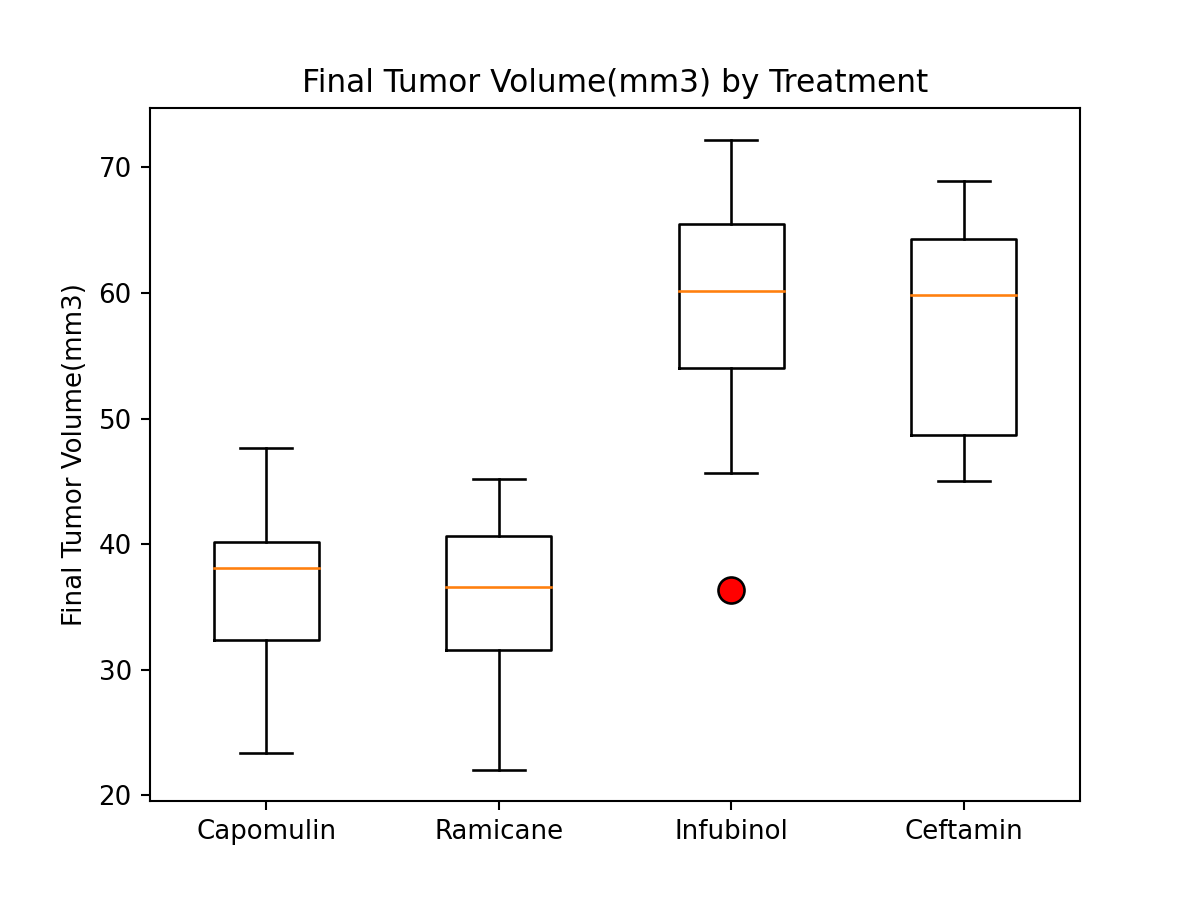

Text(0.5, 1.0, 'Final Tumor Volume(mm3) by Treatment')

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
redoutlier = dict(marker='o', markerfacecolor='red', markersize=10)
plt.boxplot(tumor_vol_data_all_four, labels=drug_list, flierprops = redoutlier)
plt.ylabel("Final Tumor Volume(mm3)")
plt.title("Final Tumor Volume(mm3) by Treatment")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


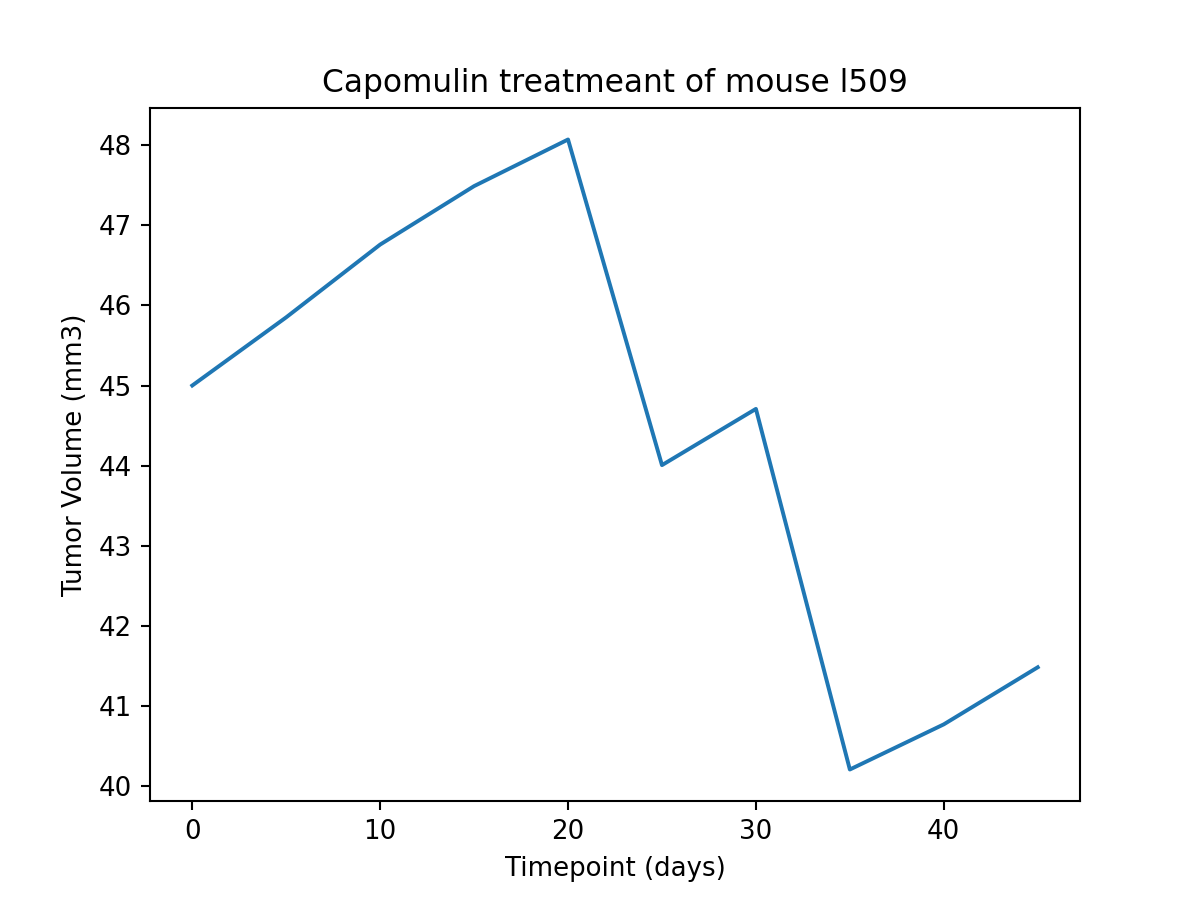

Text(0, 0.5, 'Tumor Volume (mm3)')

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_clean_df = final_clean.loc[final_clean["Drug Regimen"] == "Capomulin",:]
plot_df = Capomulin_clean_df.loc[Capomulin_clean_df["Mouse ID"] == "l509",:]
plot_df.head()
plt.plot(plot_df['Timepoint'], plot_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

<IPython.core.display.Javascript object>


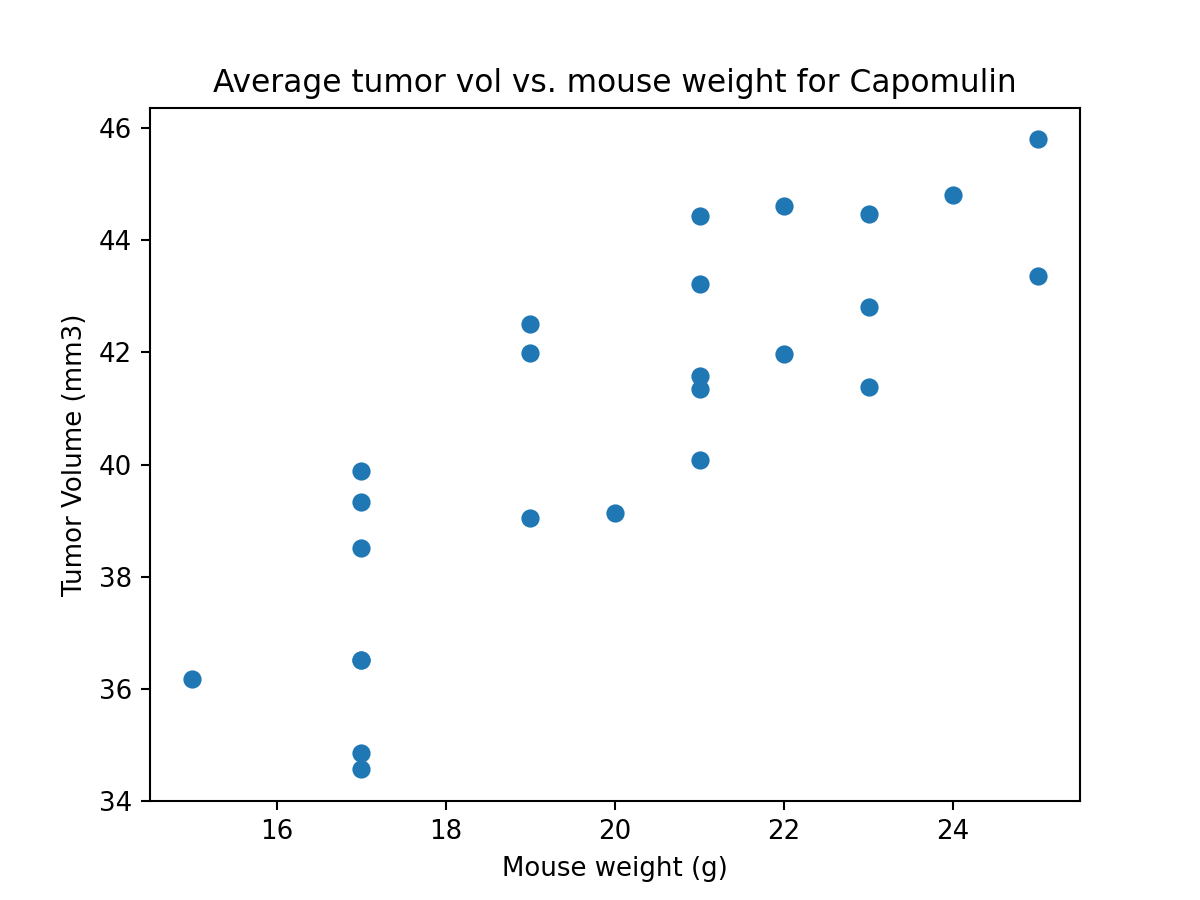

Text(0, 0.5, 'Tumor Volume (mm3)')

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_cap_vol = Capomulin_clean_df.groupby(['Mouse ID']).mean()
plt.scatter(average_cap_vol['Weight (g)'], average_cap_vol['Tumor Volume (mm3)'])
plt.title('Average tumor vol vs. mouse weight for Capomulin')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(average_cap_vol['Weight (g)'],average_cap_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [26]:
#Calculate the linear regression modelfor mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r, p, se = st.linregress(average_cap_vol['Weight (g)'], average_cap_vol['Tumor Volume (mm3)'])
regression = slope*average_cap_vol['Weight (g)'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


<IPython.core.display.Javascript object>


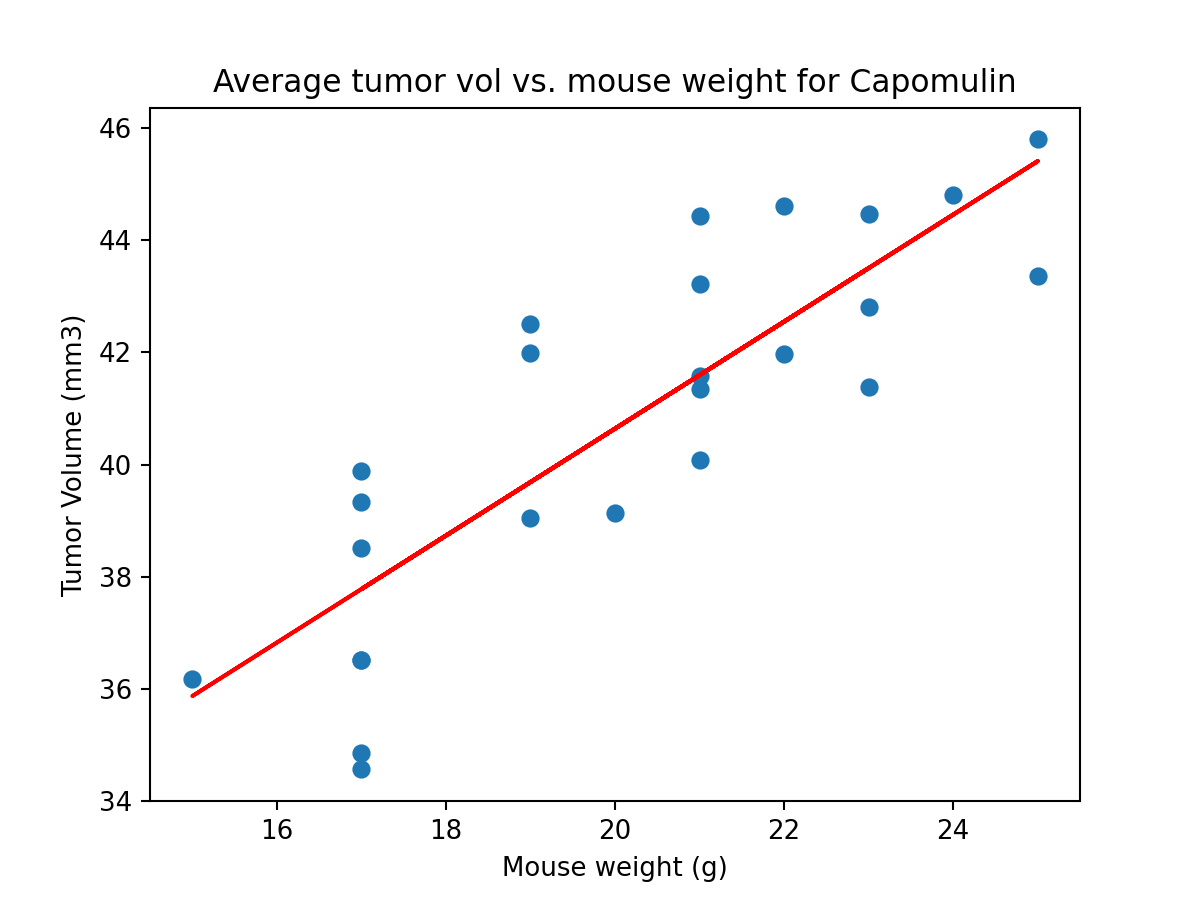

Text(0, 0.5, 'Tumor Volume (mm3)')

In [27]:
plt.scatter(average_cap_vol['Weight (g)'], average_cap_vol['Tumor Volume (mm3)'])
plt.plot(average_cap_vol['Weight (g)'], regression, color='red')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Average tumor vol vs. mouse weight for Capomulin')
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')